## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [0]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [0]:
import tensorflow as tf
from tensorflow import keras


In [0]:
import matplotlib.pyplot as plt
import numpy as np

### Find no.of samples are there in training and test datasets

In [171]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [172]:
print(x_test.shape)
print(y_test.shape)

(10000, 28, 28)
(10000,)


### Find dimensions of an image in the dataset

In [173]:
x_train[0].shape

(28, 28)

### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [0]:
from keras.utils import to_categorical

In [0]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes =10)

In [0]:
y_test = tf.keras.utils.to_categorical(y_test, num_classes =10)

### Normalize both the train and test image data from 0-255 to 0-1

In [0]:
x_train = x_train.astype('float32')       
x_test = x_test.astype('float32')
x_train /= 255                           
x_test /= 255

In [178]:
x_test.shape

(10000, 28, 28)

### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [179]:
x_train = x_train.reshape(60000, 28,28,1)    
x_test = x_test.reshape(10000, 28,28,1)    
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


### Import the necessary layers from keras to build the model

In [0]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dropout, BatchNormalization

### Build a model 

** with 2 Conv layers having `32 3*3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

In [0]:
model = Sequential()

In [182]:
model.add(tf.keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1,)))
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3),activation='relu'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
es = EarlyStopping(monitor='loss', mode='min', patience=5, verbose=1) 

model.fit(x_train, y_train,validation_data=(x_test, y_test),epochs=10,
callbacks = [es])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 10s 159us/sample - loss: 0.3723 - acc: 0.8659 - val_loss: 0.2907 - val_acc: 0.8925
Epoch 2/10
60000/60000 [==============================] - 9s 149us/sample - loss: 0.2305 - acc: 0.9140 - val_loss: 0.2589 - val_acc: 0.9087
Epoch 3/10
60000/60000 [==============================] - 9s 149us/sample - loss: 0.1673 - acc: 0.9376 - val_loss: 0.2391 - val_acc: 0.9152
Epoch 4/10
60000/60000 [==============================] - 9s 150us/sample - loss: 0.1152 - acc: 0.9568 - val_loss: 0.2760 - val_acc: 0.9084
Epoch 5/10
60000/60000 [==============================] - 9s 150us/sample - loss: 0.0778 - acc: 0.9710 - val_loss: 0.2907 - val_acc: 0.9149
Epoch 6/10
60000/60000 [==============================] - 9s 150us/sample - loss: 0.0504 - acc: 0.9817 - val_loss: 0.3774 - val_acc: 0.9122
Epoch 7/10
60000/60000 [==============================] - 9s 150us/sample - loss: 0.0355 - acc: 0.9870 - val_

### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [0]:
model = Sequential()
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu',input_shape=(28,28,1)))
model.add(tf.keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
###Adding MAXpool2D
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
#Droping out
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])


In [184]:
es = EarlyStopping(monitor='loss', mode='min', patience=5, verbose=1) 

history = model.fit(x_train, y_train,epochs=10,verbose=1,validation_data=(x_test, y_test),callbacks = [es])

score = model.evaluate(x_test, y_test, verbose=False)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 10s 164us/sample - loss: 0.4014 - acc: 0.8539 - val_loss: 0.2972 - val_acc: 0.8941
Epoch 2/10
60000/60000 [==============================] - 9s 155us/sample - loss: 0.2598 - acc: 0.9050 - val_loss: 0.2499 - val_acc: 0.9056
Epoch 3/10
60000/60000 [==============================] - 9s 155us/sample - loss: 0.2095 - acc: 0.9217 - val_loss: 0.2491 - val_acc: 0.9084
Epoch 4/10
60000/60000 [==============================] - 9s 154us/sample - loss: 0.1762 - acc: 0.9344 - val_loss: 0.2285 - val_acc: 0.9132
Epoch 5/10
60000/60000 [==============================] - 9s 155us/sample - loss: 0.1455 - acc: 0.9445 - val_loss: 0.2268 - val_acc: 0.9244
Epoch 6/10
60000/60000 [==============================] - 9s 155us/sample - loss: 0.1253 - acc: 0.9537 - val_loss: 0.2261 - val_acc: 0.9218
Epoch 7/10
60000/60000 [==============================] - 9s 154us/sample - loss: 0.1046 - acc: 0.9604 - val_

model accuracy : 0.9245


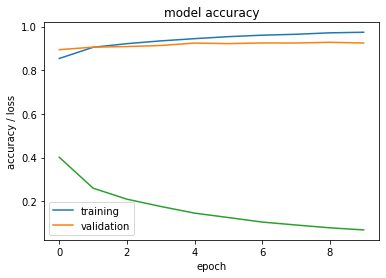

In [185]:
loss,accuracy  = model.evaluate(x_test, y_test, verbose=False)
print("model accuracy :" , accuracy)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy / loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

### Now, to the above model, lets add Data Augmentation 

### Import the ImageDataGenrator from keras and fit the training images

In [0]:
dataX= tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=20, width_shift_range=0.23, height_shift_range=0.2,
                                                               horizontal_flip=True,
                                                               validation_split=0.2)

#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

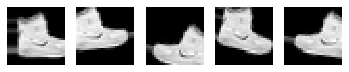

In [187]:
dataY = datagen.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

### Run the above model using fit_generator()

In [188]:
model.fit_generator(datagen.flow(x_train,y_train),
                    steps_per_epoch = 60000/32,
                    epochs=10)

Epoch 1/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.8185 - acc: 0.6979
Epoch 2/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.5959 - acc: 0.7789
Epoch 3/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.5331 - acc: 0.8023
Epoch 4/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.5014 - acc: 0.8112
Epoch 5/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.4783 - acc: 0.8225
Epoch 6/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.4639 - acc: 0.8288
Epoch 7/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.4482 - acc: 0.8343
Epoch 8/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.4387 - acc: 0.8379
Epoch 9/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.4276 - acc: 0.8413
Epoch 10/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.4229 - acc: 0.8449


###  Report the final train and validation accuracy

In [189]:
metrics= model.evaluate(x_test, y_test)
print("loss,acc",metrics)

10000/10000 [==============================] - 1s 90us/sample - loss: 0.3427 - acc: 0.8784
loss,acc [0.3426597013235092, 0.8784]


In [190]:
metrics_train = model.evaluate(x_train, y_train)
print("loss,acc",metrics_train)

60000/60000 [==============================] - 5s 90us/sample - loss: 0.2876 - acc: 0.8943
loss,acc [0.28761040041446684, 0.89426666]


## **DATA AUGMENTATION ON CIFAR10 DATASET**

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

### **Import neessary libraries for data augmentation**

In [0]:
from tensorflow.keras.datasets import cifar10

### **Load CIFAR10 dataset**

In [0]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [0]:
x_train = x_train / 255.0
x_test = x_test / 255.0

### **Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.**

In [0]:
D0 = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=50,
    width_shift_range=0.5,
    height_shift_range=0.5,
    horizontal_flip=True,
    vertical_flip=True)

### **Prepare/fit the generator.**

In [0]:
datagen.fit(x_train)

### **Generate 5 images for 1 of the image of CIFAR10 train dataset.**

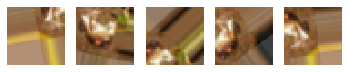

In [222]:
from matplotlib import pyplot as plt
D1 = datagen.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()